<a href="https://colab.research.google.com/github/Bea2020-Mant/WWCodeDataScience/blob/master/Analisis_de_Datos_Covid19_Per%C3%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
¿Qué es Pandas? Es la librería de Python para el Análisis de Datos o Python Data Analysis Library

Para la sesión de hoy usaremos el dataset de [Datos Abiertos de Covid-19](https://www.datosabiertos.gob.pe/group/datos-abiertos-de-covid-19)

# Dataset: Casos Positivos

In [1]:
import pandas as pd
import requests
import io 

url = 'https://raw.githubusercontent.com/stephfz/analisis_codiv_pe/master/datos/positivos_covid_30may.csv'
s = requests.get(url).content

# creamos una variable que se convertira en el contenedor de la data = dataframe
casos_positivos_df = pd.read_csv(io.StringIO(s.decode('latin1')))

casos_positivos_df.head(5)

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,7320cabdc1aaca6c59014cae76a134e6,AMAZONAS,BAGUA,BAGUA,PCR,15.0,MASCULINO,7/04/2020
1,e81602051997ace8340bb8c18fe24c65,AMAZONAS,BAGUA,COPALLIN,PCR,73.0,MASCULINO,7/04/2020
2,cecdbf10074dbc011ae05b3cbd320a6f,AMAZONAS,BONGARA,JAZAN,PCR,85.0,MASCULINO,9/04/2020
3,71ecb6bccb248b0bb2ac72ed51b5e979,AMAZONAS,CHACHAPOYAS,HUANCAS,PCR,31.0,MASCULINO,9/04/2020
4,566af4276cbe9359abe93f9aa86396c3,AMAZONAS,BAGUA,COPALLIN,PCR,41.0,MASCULINO,9/04/2020


In [2]:
## Dimension del dataframe
casos_positivos_df.shape

(148295, 8)

In [3]:
## Revisión rápida de los tipos de cada columna 
## qué tipos de datos tiene pandas? https://pbpython.com/pandas_dtypes.html
casos_positivos_df.dtypes

UUID                object
DEPARTAMENTO        object
PROVINCIA           object
DISTRITO            object
METODODX            object
EDAD               float64
SEXO                object
FECHA_RESULTADO     object
dtype: object

In [4]:
## Listemos las columnas del dataframe
casos_positivos_df.columns

Index(['UUID', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'METODODX', 'EDAD',
       'SEXO', 'FECHA_RESULTADO'],
      dtype='object')

In [5]:
## Veamos la cantidad de valores nulos por columna del dataframe
columns = casos_positivos_df.columns.tolist()
for column in columns:
  print('Valores nulos para la columna <{0}> : {1}'.format(column, casos_positivos_df[column].isnull().sum()))

Valores nulos para la columna <UUID> : 0
Valores nulos para la columna <DEPARTAMENTO> : 0
Valores nulos para la columna <PROVINCIA> : 0
Valores nulos para la columna <DISTRITO> : 0
Valores nulos para la columna <METODODX> : 0
Valores nulos para la columna <EDAD> : 242
Valores nulos para la columna <SEXO> : 1675
Valores nulos para la columna <FECHA_RESULTADO> : 222


In [6]:
## Revisemos cuantos departamento estan contenidos en el dataframe
len(casos_positivos_df.DEPARTAMENTO.unique())

25

In [7]:
## Revisemos unas cuantos registro del departamento de PUNO
casos_positivos_df[casos_positivos_df.DEPARTAMENTO == 'PUNO'].head(5)

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
35610,cb45e9b7c14f65a7fa6943f508b50c13,PUNO,PUNO,PUNO,PCR,31.0,FEMENINO,6/04/2020
35611,d214a2a818ee8a7ad15b97fe8927e6cd,PUNO,PUNO,PUNO,PCR,29.0,MASCULINO,11/04/2020
35612,7c5bfd8fabc83537b8743a7a89afde77,PUNO,CHUCUITO,ZEPITA,PCR,27.0,MASCULINO,17/04/2020
35613,29289e55d182194e94e155a27fd7b69e,PUNO,PUNO,PUNO,PCR,40.0,FEMENINO,22/04/2020
35614,b4b1358d4489118e7760c8432345cb2e,PUNO,PUNO,CHUCUITO,PCR,37.0,MASCULINO,22/04/2020


In [9]:
## Veamos los resultados por Sexo y Edad
pd.crosstab(casos_positivos_df.DEPARTAMENTO, casos_positivos_df.SEXO)

SEXO,FEMENINO,MASCULINO
DEPARTAMENTO,,
AMAZONAS,241,326
ANCASH,1242,2114
APURIMAC,88,71
AREQUIPA,1100,2027
AYACUCHO,295,380
CAJAMARCA,284,412
CALLAO,3059,7650
CUSCO,379,535
HUANCAVELICA,175,229


In [10]:
# Para poder hacer un analisis sobre las edades es mejor definir rangos de edades
#rango_edades = {"A" : 16, "B": 31, "C": 51, "D": 70}  #, "E" >70 }
rango_edades = {"D" : 70, "C": 51, "B": 31, "A": 16} 
for rango in rango_edades:
  print(rango)

D
C
B
A


In [0]:
## Agregamos una columna para la definicion de rangos de edad
import numpy as np
casos_positivos_df["RangoEdad"] = np.nan
#casos_positivos_df['RangoEdad'].count()

In [12]:
## Iteramos sobre el dataframe y empezamos a guardar el rango de edad por registro
for rango in rango_edades:
  casos_positivos_df['RangoEdad'] = np.where(casos_positivos_df['EDAD'] < rango_edades[rango], rango, casos_positivos_df['RangoEdad'] )

casos_positivos_df['RangoEdad'].head()

0      A
1    nan
2    nan
3      C
4      C
Name: RangoEdad, dtype: object

In [13]:
## Verificamos que los cambios hayan sido aplicados
casos_positivos_df.head(20)

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,RangoEdad
0,7320cabdc1aaca6c59014cae76a134e6,AMAZONAS,BAGUA,BAGUA,PCR,15.0,MASCULINO,7/04/2020,A
1,e81602051997ace8340bb8c18fe24c65,AMAZONAS,BAGUA,COPALLIN,PCR,73.0,MASCULINO,7/04/2020,nan
2,cecdbf10074dbc011ae05b3cbd320a6f,AMAZONAS,BONGARA,JAZAN,PCR,85.0,MASCULINO,9/04/2020,nan
3,71ecb6bccb248b0bb2ac72ed51b5e979,AMAZONAS,CHACHAPOYAS,HUANCAS,PCR,31.0,MASCULINO,9/04/2020,C
4,566af4276cbe9359abe93f9aa86396c3,AMAZONAS,BAGUA,COPALLIN,PCR,41.0,MASCULINO,9/04/2020,C
5,027561e9d126e7c283d79c02cede562d,AMAZONAS,BAGUA,BAGUA,PCR,54.0,FEMENINO,9/04/2020,D
6,f016889b9ba5bd95cf15d60205cbd82e,AMAZONAS,BAGUA,BAGUA,PCR,12.0,MASCULINO,9/04/2020,A
7,971f8e1295583756d81fe42f3318488c,AMAZONAS,BAGUA,BAGUA,PCR,57.0,MASCULINO,12/04/2020,D
8,bc45b71b005a96f32eeb97060616a999,AMAZONAS,BAGUA,COPALLIN,PCR,22.0,MASCULINO,12/04/2020,B
9,0e2a1928ddd07d99978758e86b034131,AMAZONAS,BAGUA,COPALLIN,PCR,60.0,FEMENINO,12/04/2020,D


In [15]:
## Aplicamos la conversion del ultima tramo de rango de edades
casos_positivos_df['RangoEdad'] = np.where(casos_positivos_df['EDAD']>=70, "E", casos_positivos_df['RangoEdad'] )
casos_positivos_df.head(5)

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,RangoEdad
0,7320cabdc1aaca6c59014cae76a134e6,AMAZONAS,BAGUA,BAGUA,PCR,15.0,MASCULINO,7/04/2020,A
1,e81602051997ace8340bb8c18fe24c65,AMAZONAS,BAGUA,COPALLIN,PCR,73.0,MASCULINO,7/04/2020,E
2,cecdbf10074dbc011ae05b3cbd320a6f,AMAZONAS,BONGARA,JAZAN,PCR,85.0,MASCULINO,9/04/2020,E
3,71ecb6bccb248b0bb2ac72ed51b5e979,AMAZONAS,CHACHAPOYAS,HUANCAS,PCR,31.0,MASCULINO,9/04/2020,C
4,566af4276cbe9359abe93f9aa86396c3,AMAZONAS,BAGUA,COPALLIN,PCR,41.0,MASCULINO,9/04/2020,C


In [16]:
## Verificamos si hay valores nulos en la edad
casos_positivos_df[casos_positivos_df.RangoEdad == 'nan']

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,RangoEdad
105,609f3097ba0ece5aa00b3ebf2d1f958b,AMAZONAS,BAGUA,ARAMANGO,PCR,NaN,MASCULINO,21/05/2020,nan
1773,80023acdbd88df99fffe7b093c2da92f,CAJAMARCA,JAEN,COLASAY,PCR,NaN,MASCULINO,12/05/2020,nan
1818,3a2eb54d1e2b757dcf267fab3fc2d237,CAJAMARCA,JAEN,SAN FELIPE,PCR,NaN,MASCULINO,18/05/2020,nan
4529,47e4f70fe9aecdc8bfb8cfa5a237f38c,HUANUCO,EN INVESTIGACIÓN,EN INVESTIGACIÓN,PCR,NaN,NaN,NaN,nan
5650,d9c4cc78e631eb0162451291e5228d70,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA,PCR,NaN,FEMENINO,18/04/2020,nan
...,...,...,...,...,...,...,...,...,...
130330,1187a95eb58e3e0614ebabaf951566cb,LIMA,LIMA,LIMA,PR,NaN,NaN,25/04/2020,nan
130404,ba4f15ca38b0292c02c80bd1b35e39bc,LIMA,LIMA,SAN MARTIN DE PORRES,PR,NaN,NaN,25/04/2020,nan
145409,f26cceb6ec74929748754aac54d066eb,UCAYALI,CORONEL PORTILLO,CALLERIA,PR,NaN,FEMENINO,27/04/2020,nan
147899,92fbba5f7e9b2e9aaddc44c0670e657b,UCAYALI,CORONEL PORTILLO,CALLERIA,PR,NaN,FEMENINO,NaN,nan


In [17]:
## Hagamos una "tabla cruzada" por Departamento y Rango de Edad
pd.crosstab(casos_positivos_df.DEPARTAMENTO, casos_positivos_df.RangoEdad)

RangoEdad,A,B,C,D,E,nan
DEPARTAMENTO,,,,,,
AMAZONAS,38,198,197,110,27,1
ANCASH,121,684,1462,855,255,7
APURIMAC,14,30,78,34,6,0
AREQUIPA,79,622,1613,684,147,1
AYACUCHO,44,223,241,128,43,0
CAJAMARCA,45,205,295,114,39,2
CALLAO,215,2389,4934,2516,721,6
CUSCO,55,276,402,163,20,0
HUANCAVELICA,67,162,136,32,10,0


In [19]:
## Veamos la lista de Departamentos en el dataframe
departamentos = casos_positivos_df.DEPARTAMENTO.unique()
for d in departamentos:
  print(d)

AMAZONAS
ANCASH
APURIMAC
AREQUIPA
AYACUCHO
CAJAMARCA
CALLAO
CUSCO
ICA
LIMA
HUANCAVELICA
HUANUCO
JUNIN
LA LIBERTAD
LAMBAYEQUE
LORETO
MADRE DE DIOS
MOQUEGUA
PASCO
PIURA
PUNO
SAN MARTIN
TACNA
TUMBES
UCAYALI


In [20]:
## Hagamos una iteracion por departamento y ver la distribucion de infectados
## por RangoEdad y Sexo
departamentos = casos_positivos_df.DEPARTAMENTO.unique()
for d in departamentos:
  df_temp = casos_positivos_df[casos_positivos_df.DEPARTAMENTO == d]
  print("*--------- {} ---------*".format(d))
  print(pd.crosstab(df_temp.SEXO, casos_positivos_df.RangoEdad))
  print("\n")

*--------- AMAZONAS ---------*
RangoEdad   A    B    C   D   E  nan
SEXO                                
FEMENINO   20   75   85  52   9    0
MASCULINO  16  121  112  58  18    1


*--------- ANCASH ---------*
RangoEdad   A    B    C    D    E
SEXO                             
FEMENINO   65  243  541  290  103
MASCULINO  54  438  914  558  150


*--------- APURIMAC ---------*
RangoEdad  A   B   C   D  E
SEXO                       
FEMENINO   6  18  45  16  3
MASCULINO  7  12  32  17  3


*--------- AREQUIPA ---------*
RangoEdad   A    B     C    D   E  nan
SEXO                                  
FEMENINO   46  206   496  274  78    0
MASCULINO  33  403  1116  405  69    1


*--------- AYACUCHO ---------*
RangoEdad   A    B    C   D   E
SEXO                           
FEMENINO   20   71  113  64  27
MASCULINO  24  150  127  63  16


*--------- CAJAMARCA ---------*
RangoEdad   A    B    C   D   E  nan
SEXO                                
FEMENINO   16   87  102  57  22    0
MASCULINO  26 

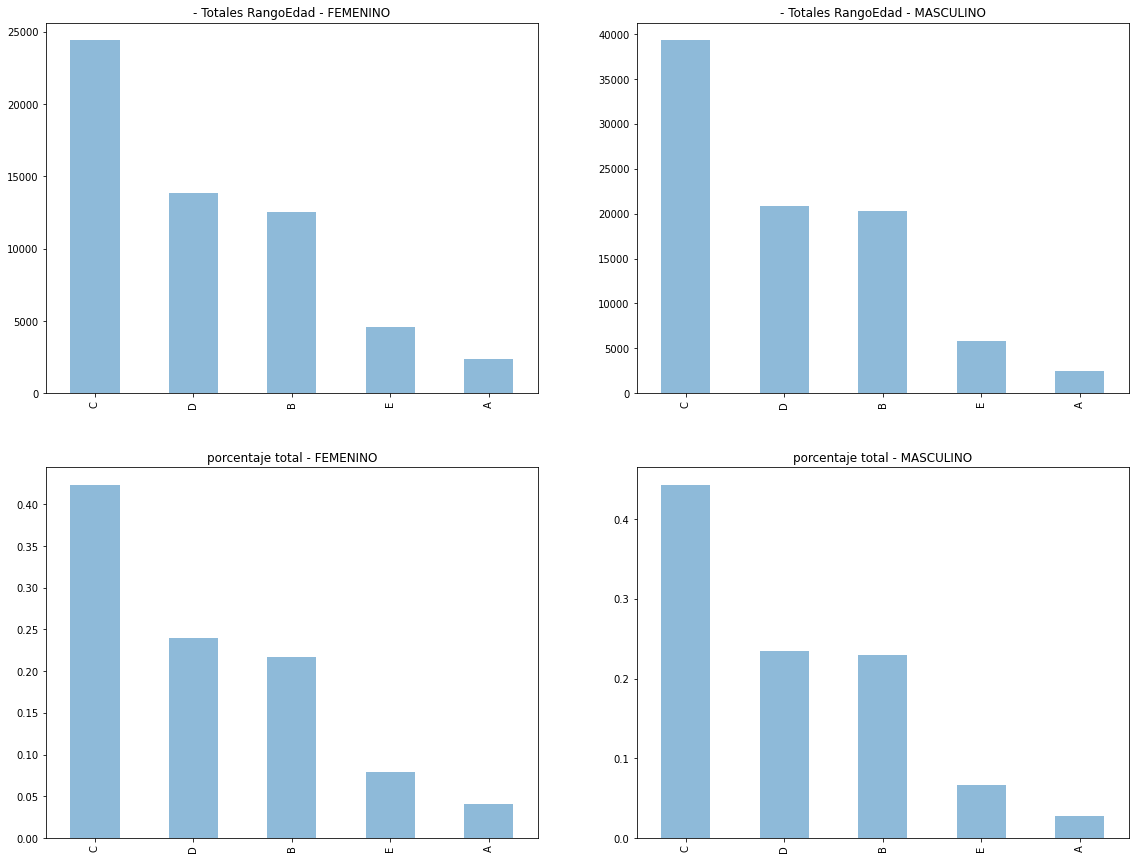

In [21]:
## Hagamos un intento de visualizacion

import matplotlib.pyplot as plt

cs_femenino = casos_positivos_df[casos_positivos_df.SEXO == 'FEMENINO']
cs_masculino = casos_positivos_df[casos_positivos_df.SEXO == 'MASCULINO']
cs_masculino = cs_masculino.dropna(subset =['EDAD'])
cs_femenino = cs_femenino.dropna(subset =['EDAD'])

fig = plt.figure(figsize=(30,15)) #creamos un canvas o figura de 30x10 pixeles

# queremos ver un plot al costado del otro, para esto pensemos en una grilla (celdas)
plt.subplot2grid((2,3),(0,0))
cs_femenino.RangoEdad.value_counts().plot(kind='bar', alpha=0.5)
plt.title('- Totales RangoEdad - FEMENINO')

plt.subplot2grid((2,3),(0,1))
cs_masculino.RangoEdad.value_counts().plot(kind='bar', alpha=0.5)
plt.title('- Totales RangoEdad - MASCULINO')

plt.subplot2grid((2,3),(1,0))
cs_femenino.RangoEdad.value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title('porcentaje total - FEMENINO')

plt.subplot2grid((2,3),(1,1))
cs_masculino.RangoEdad.value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title('porcentaje total - MASCULINO')

plt.show()

# Dataset: Fallecidos por covid

In [22]:
import pandas as pd
import requests
import io 

url = 'https://raw.githubusercontent.com/stephfz/analisis_codiv_pe/master/datos/fallecidos_covid.csv'
s = requests.get(url).content

fallecidos_covid_df = pd.read_csv(io.StringIO(s.decode('latin1')))

fallecidos_covid_df.head(5)

,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO
0,056f73432adaf077b06ab0f9453ce753,24/03/2020,76,MASCULINO,NaN,CUSCO,CUSCO,CUSCO
1,4bac0872ed7858eec6b438947227cf66,27/03/2020,64,MASCULINO,NaN,CUSCO,CUSCO,CUSCO
2,27aa0530a6faa06b6589a9271853f66d,9/05/2020,63,FEMENINO,NaN,TUMBES,TUMBES,PAMPAS DE HOSPITAL
3,5f13c1fd068654311d45f1a45f1a532e,30/03/2020,53,MASCULINO,NaN,LIMA,LIMA,SAN ISIDRO
4,c656a7a3f3bdaecb4a97c6a1d2a80fb8,2/04/2020,68,MASCULINO,NaN,CUSCO,CUSCO,CUSCO


In [23]:
## Dimensiones de Dataset
fallecidos_covid_df.shape

(4767, 8)

In [24]:
## Valores nulos por columna del dataset
columns = fallecidos_covid_df.columns.tolist()
for column in columns:
  print('Valores nulos para la columna <{0}> : {1}'.format(column, fallecidos_covid_df[column].isnull().sum()))

Valores nulos para la columna <UUID> : 0
Valores nulos para la columna <FECHA_FALLECIMIENTO> : 0
Valores nulos para la columna <EDAD_DECLARADA> : 0
Valores nulos para la columna <SEXO> : 0
Valores nulos para la columna <FECHA_NAC> : 747
Valores nulos para la columna <DEPARTAMENTO> : 0
Valores nulos para la columna <PROVINCIA> : 1338
Valores nulos para la columna <DISTRITO> : 805


In [25]:
## Veamos como obtener la cuenta de fallecidos por departamento

fallecidos_covid_df.groupby('DEPARTAMENTO').count()
#fallecidos_covid_df.groupby(['DEPARTAMENTO'])['EDAD_DECLARADA'].count().sort_values(ascending=False)

,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,PROVINCIA,DISTRITO
DEPARTAMENTO,,,,,,,
AMAZONAS,26,26,26,26,26,23,23
ANCASH,277,277,277,277,132,133,242
APURIMAC,3,3,3,3,3,3,3
AREQUIPA,50,50,50,50,50,42,42
AYACUCHO,7,7,7,7,7,4,4
CAJAMARCA,7,7,7,7,7,7,7
CALLAO,338,338,338,338,148,185,304
CUSCO,3,3,3,3,0,3,3
HUANCAVELICA,1,1,1,1,1,1,1


In [26]:
## Veamos algunos indicadores estadisticos del dataframe
fallecidos_covid_df.describe()

,EDAD_DECLARADA
count,4767.000000
mean,65.228655
std,14.296136
min,0.000000
25%,56.000000
50%,66.000000
75%,75.000000
max,99.000000


In [27]:
rango_edades = {"D" : 70, "C": 51, "B": 31, "A": 16} 
for rango in rango_edades:
  print(rango)

D
C
B
A


In [28]:
fallecidos_covid_df.head(5)

,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO
0,056f73432adaf077b06ab0f9453ce753,24/03/2020,76,MASCULINO,NaN,CUSCO,CUSCO,CUSCO
1,4bac0872ed7858eec6b438947227cf66,27/03/2020,64,MASCULINO,NaN,CUSCO,CUSCO,CUSCO
2,27aa0530a6faa06b6589a9271853f66d,9/05/2020,63,FEMENINO,NaN,TUMBES,TUMBES,PAMPAS DE HOSPITAL
3,5f13c1fd068654311d45f1a45f1a532e,30/03/2020,53,MASCULINO,NaN,LIMA,LIMA,SAN ISIDRO
4,c656a7a3f3bdaecb4a97c6a1d2a80fb8,2/04/2020,68,MASCULINO,NaN,CUSCO,CUSCO,CUSCO


In [0]:
## Agregamos una columna para la definicion de rangos de edad
import numpy as np
fallecidos_covid_df["RangoEdad"] = np.nan
#casos_positivos_df['RangoEdad'].count()

In [32]:
## Iteramos sobre el dataframe y empezamos a guardar el rango de edad por registro
for rango in rango_edades:
  fallecidos_covid_df['RangoEdad'] = np.where(fallecidos_covid_df['EDAD_DECLARADA'] < rango_edades[rango], rango, fallecidos_covid_df['RangoEdad'] )


fallecidos_covid_df['RangoEdad'].head()

0    nan
1      D
2      D
3      D
4      D
Name: RangoEdad, dtype: object

In [33]:
## Transformamos el ultimo rango de edad en el dataframe
fallecidos_covid_df['RangoEdad'] = np.where(fallecidos_covid_df['EDAD_DECLARADA']>=70, "E", fallecidos_covid_df['RangoEdad'] )
fallecidos_covid_df.head(5)

,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO,RangoEdad
0,056f73432adaf077b06ab0f9453ce753,24/03/2020,76,MASCULINO,NaN,CUSCO,CUSCO,CUSCO,E
1,4bac0872ed7858eec6b438947227cf66,27/03/2020,64,MASCULINO,NaN,CUSCO,CUSCO,CUSCO,D
2,27aa0530a6faa06b6589a9271853f66d,9/05/2020,63,FEMENINO,NaN,TUMBES,TUMBES,PAMPAS DE HOSPITAL,D
3,5f13c1fd068654311d45f1a45f1a532e,30/03/2020,53,MASCULINO,NaN,LIMA,LIMA,SAN ISIDRO,D
4,c656a7a3f3bdaecb4a97c6a1d2a80fb8,2/04/2020,68,MASCULINO,NaN,CUSCO,CUSCO,CUSCO,D


In [34]:
## Veamos la agrupacion de Fallecidos por Edad en cada Departamento
pd.crosstab(fallecidos_covid_df.DEPARTAMENTO, fallecidos_covid_df.RangoEdad)

RangoEdad,A,B,C,D,E
DEPARTAMENTO,,,,,
AMAZONAS,0,1,4,10,11
ANCASH,0,0,30,132,115
APURIMAC,0,0,0,2,1
AREQUIPA,1,1,7,17,24
AYACUCHO,0,0,2,0,5
CAJAMARCA,0,0,3,1,3
CALLAO,0,5,37,162,134
CUSCO,0,0,0,2,1
HUANCAVELICA,0,0,0,1,0


In [37]:
## Veamos la cantidad de fallecidos por Rango de Edad
fallecidos_covid_df.groupby(['RangoEdad'])['EDAD_DECLARADA'].count().sort_values(ascending=False)

RangoEdad
D    2187
E    1907
C     599
B      53
A      21
Name: EDAD_DECLARADA, dtype: int64

In [36]:
## Veamos la agrupacion de fallecidos por Sexo
pd.crosstab(fallecidos_covid_df.DEPARTAMENTO, fallecidos_covid_df.SEXO)

SEXO,FEMENINO,INDETERMINADO,MASCULINO
DEPARTAMENTO,,,
AMAZONAS,5,5,16
ANCASH,70,25,182
APURIMAC,0,2,1
AREQUIPA,6,17,27
AYACUCHO,2,1,4
CAJAMARCA,2,3,2
CALLAO,85,40,213
CUSCO,0,0,3
HUANCAVELICA,0,0,1


In [38]:
## Veamos la agrupacion de fallecidos por Sexo y Rango de Edad
pd.crosstab(fallecidos_covid_df.SEXO, fallecidos_covid_df.RangoEdad)

RangoEdad,A,B,C,D,E
SEXO,,,,,
FEMENINO,13,12,127,493,544
INDETERMINADO,1,10,57,255,214
MASCULINO,7,31,415,1439,1149


In [40]:
# #¿Cúantos fallecidxs hay por sexo en cada departamento?
pd.crosstab( fallecidos_covid_df.DEPARTAMENTO, fallecidos_covid_df.SEXO)

SEXO,FEMENINO,INDETERMINADO,MASCULINO
DEPARTAMENTO,,,
AMAZONAS,5,5,16
ANCASH,70,25,182
APURIMAC,0,2,1
AREQUIPA,6,17,27
AYACUCHO,2,1,4
CAJAMARCA,2,3,2
CALLAO,85,40,213
CUSCO,0,0,3
HUANCAVELICA,0,0,1


# Dataset: Contratación directa

In [41]:
import pandas as pd
import requests
import io 
url = 'https://raw.githubusercontent.com/stephfz/analisis_codiv_pe/master/datos/CONTRATACIONDIRECTA.csv'
s=requests.get(url).content

contratacion_df = pd.read_csv(io.StringIO(s.decode('latin1')))
contratacion_df.head(3)

,CODIGOENTIDAD,RUC_ENTIDAD,ENTIDAD,ENTIDAD_DEPARTAMENTO,ENTIDAD_PROVINCIA,ENTIDAD_DISTRITO,FECHACONVOCATORIA,OBJETOCONTRACTUAL,PROCESO,CODIGOCONVOCATORIA,DESCRIPCION_PROCESO,NUMERO_ITEM,ITEMCONVOCA_DESCRIPCION,ITEMCONVOCA_UNIDADMEDIDA,SECTOR,TIPOENTIDADOEE,TIPOPROCESO,ITEM_DEPARTAMENTO,ITEM_PROVINCIA,ITEM_DISTRITO,ESTADOITEMCONVOCA,ULTIMO,MONEDA,CAUSAL_EXOR_CONT_DIRECTA,MONTOREFERENCIAL,MONTOREFERENCIALSOLES,MONTOADJUDICADO,MONTOADJUDICADOSOLES,TIPOPROVEEDOR,RUCPROVEEDOR,PROVEEDOR,RUCDETALLEPROVEEDOR,DETALLEPROVEEDOR,URLFICHAPROCESO,RUBROS
0,1722,20192145831,MUNICIPALIDAD PROVINCIAL DE SANDIA,PUNO,SANDIA,SANDIA,16/03/20,Bien,DIRECTA-PROC-2-2020-MPS/OEC-1,607343,CONTRATACIÃN DIRECTA DE SUMINISTRO DE COMBUST...,1,CONTRATACIÂ¿N DIRECTA DE SUMINISTRO DE COMBUST...,Galon,GOBIERNO LOCAL,GOBIERNO LOCAL,ContrataciÃ³n Directa,PUNO,SANDIA,SANDIA,Adjudicado,ULTIMO,Soles,SituaciÃ³n emergencia,177480,177480,177480,177480,Persona Juridica,20603220103,GRIFO BRISAS DE SAN JUAN EMPRESA INDIVIDUAL DE...,NaN,NaN,http://prodapp2.seace.gob.pe/seacebus-uiwd-pub...,OTROS BIENES
1,200209,20493452241,MUNICIPALIDAD DISTRITAL DE ANDOAS,LORETO,DATEM DEL MARANON,ANDOAS,17/03/20,ConsultorÃ­a de Obra,DIRECTA-PROC-1-2020-MDA-OEC-1,607559,ELABORACION DEL EXPEDIENTE TECNICO DE LAS IOAR...,1,ELABORACION DE EXPEDIENTE TECNICO DE LA IOARR:...,Servicio,GOBIERNO LOCAL,GOBIERNO LOCAL,ContrataciÃ³n Directa,LORETO,DATEM DEL MARANON,ANDOAS,Adjudicado,ULTIMO,Soles,SituaciÃ³n emergencia,40000,40000,40000,40000,Persona Juridica,20601764050,NOUS GROUP S.A.C.,NaN,NaN,http://prodapp2.seace.gob.pe/seacebus-uiwd-pub...,OTROS SERVICIOS
2,200209,20493452241,MUNICIPALIDAD DISTRITAL DE ANDOAS,LORETO,DATEM DEL MARANON,ANDOAS,17/03/20,ConsultorÃ­a de Obra,DIRECTA-PROC-1-2020-MDA-OEC-1,607559,ELABORACION DEL EXPEDIENTE TECNICO DE LAS IOAR...,2,ELABORACION DEL EXPEDIENTE TECNICO DE LA IOARR...,Servicio,GOBIERNO LOCAL,GOBIERNO LOCAL,ContrataciÃ³n Directa,LORETO,DATEM DEL MARANON,ANDOAS,Adjudicado,ULTIMO,Soles,SituaciÃ³n emergencia,40000,40000,40000,40000,Persona Juridica,20601764050,NOUS GROUP S.A.C.,NaN,NaN,http://prodapp2.seace.gob.pe/seacebus-uiwd-pub...,OTROS SERVICIOS


In [42]:
## Veamos la dimension del dataset de contraciones
contratacion_df.shape

(2676, 35)

In [43]:
## Obtengamos la lista de columnas.
contratacion_columns = contratacion_df.columns.tolist()
contratacion_columns

['CODIGOENTIDAD',
 'RUC_ENTIDAD',
 'ENTIDAD',
 'ENTIDAD_DEPARTAMENTO',
 'ENTIDAD_PROVINCIA',
 'ENTIDAD_DISTRITO',
 'FECHACONVOCATORIA',
 'OBJETOCONTRACTUAL',
 'PROCESO',
 'CODIGOCONVOCATORIA',
 'DESCRIPCION_PROCESO',
 'NUMERO_ITEM',
 'ITEMCONVOCA_DESCRIPCION',
 'ITEMCONVOCA_UNIDADMEDIDA',
 'SECTOR',
 'TIPOENTIDADOEE',
 'TIPOPROCESO',
 'ITEM_DEPARTAMENTO',
 'ITEM_PROVINCIA',
 'ITEM_DISTRITO',
 'ESTADOITEMCONVOCA',
 'ULTIMO',
 'MONEDA',
 'CAUSAL_EXOR_CONT_DIRECTA',
 'MONTOREFERENCIAL',
 'MONTOREFERENCIALSOLES',
 'MONTOADJUDICADO',
 'MONTOADJUDICADOSOLES',
 'TIPOPROVEEDOR',
 'RUCPROVEEDOR',
 'PROVEEDOR',
 'RUCDETALLEPROVEEDOR',
 'DETALLEPROVEEDOR',
 'URLFICHAPROCESO',
 'RUBROS']

In [44]:
## Veamos con que tipo de datos contamos
contratacion_df.dtypes

CODIGOENTIDAD                 int64
RUC_ENTIDAD                   int64
ENTIDAD                      object
ENTIDAD_DEPARTAMENTO         object
ENTIDAD_PROVINCIA            object
ENTIDAD_DISTRITO             object
FECHACONVOCATORIA            object
OBJETOCONTRACTUAL            object
PROCESO                      object
CODIGOCONVOCATORIA            int64
DESCRIPCION_PROCESO          object
NUMERO_ITEM                   int64
ITEMCONVOCA_DESCRIPCION      object
ITEMCONVOCA_UNIDADMEDIDA     object
SECTOR                       object
TIPOENTIDADOEE               object
TIPOPROCESO                  object
ITEM_DEPARTAMENTO            object
ITEM_PROVINCIA               object
ITEM_DISTRITO                object
ESTADOITEMCONVOCA            object
ULTIMO                       object
MONEDA                       object
CAUSAL_EXOR_CONT_DIRECTA     object
MONTOREFERENCIAL             object
MONTOREFERENCIALSOLES        object
MONTOADJUDICADO              object
MONTOADJUDICADOSOLES        

In [45]:
## Cuantos RUCPROVEEDOR unicos hay en el dataset 
len(contratacion_df.RUCPROVEEDOR.unique())

1573

In [0]:
## La columna RUCPROVEEDOR es de tipo de dato int64 lo cual no tiene mucho sentido, hagamos una conversion a string
contratacion_df['RUCPROVEEDOR'] = contratacion_df['RUCPROVEEDOR'].astype(str)

In [48]:
## Veamos el ranking de proveedores
contratacion_df['RUCPROVEEDOR'].value_counts(sort=True, ascending=False)

20602777279    21
20419385442    14
20502503180    14
20541200101    13
20492092313    12
               ..
20568779593     1
20603469136     1
20604259194     1
20493869311     1
10421660021     1
Name: RUCPROVEEDOR, Length: 1573, dtype: int64

In [49]:
## Veamos los registros con RUCPROVEEDOR con mayor contrataciones
contratacion_df[contratacion_df['RUCPROVEEDOR'] == '20602777279' ]

,CODIGOENTIDAD,RUC_ENTIDAD,ENTIDAD,ENTIDAD_DEPARTAMENTO,ENTIDAD_PROVINCIA,ENTIDAD_DISTRITO,FECHACONVOCATORIA,OBJETOCONTRACTUAL,PROCESO,CODIGOCONVOCATORIA,DESCRIPCION_PROCESO,NUMERO_ITEM,ITEMCONVOCA_DESCRIPCION,ITEMCONVOCA_UNIDADMEDIDA,SECTOR,TIPOENTIDADOEE,TIPOPROCESO,ITEM_DEPARTAMENTO,ITEM_PROVINCIA,ITEM_DISTRITO,ESTADOITEMCONVOCA,ULTIMO,MONEDA,CAUSAL_EXOR_CONT_DIRECTA,MONTOREFERENCIAL,MONTOREFERENCIALSOLES,MONTOADJUDICADO,MONTOADJUDICADOSOLES,TIPOPROVEEDOR,RUCPROVEEDOR,PROVEEDOR,RUCDETALLEPROVEEDOR,DETALLEPROVEEDOR,URLFICHAPROCESO,RUBROS
30,319,20185897967,MUNICIPALIDAD DISTRITAL DE CURAHUASI,APURIMAC,ABANCAY,CURAHUASI,23/04/20,Bien,DIRECTA-PROC-1-2020-MDC-1,607777,ADQUISICIÃN DE PRODUCTOS DE PRIMERA NECESIDAD...,2,"COMPRA DE ACEITE, FIDEOS Y LENTEJA",Unidad,GOBIERNO LOCAL,GOBIERNO LOCAL,ContrataciÃ³n Directa,APURIMAC,ABANCAY,CURAHUASI,Contratado,ULTIMO,Soles,SituaciÃ³n emergencia,"64100,7","64100,7","64100,7","64100,7",Persona Juridica,20602777279,POTREROO S.A.C.,NaN,NaN,http://prodapp2.seace.gob.pe/seacebus-uiwd-pub...,CANASTA DE VIVERES
706,386,20193220763,MUNICIPALIDAD DISTRITAL DE VIRUNDO,APURIMAC,GRAU,VIRUNDO,21/04/20,Bien,DIRECTA-PROC-1-2020-MDV-1,609135,ADQUISICION DE PRODUCTOS DE PRIMERA NECESIDAD ...,1,ADQUISICION DE PRODUCTOS DE PRIMERA NECESIDAD ...,Unidad,GOBIERNO LOCAL,GOBIERNO LOCAL,ContrataciÃ³n Directa,APURIMAC,GRAU,VIRUNDO,Contratado,ULTIMO,Soles,SituaciÃ³n emergencia,"46979,34","46979,34","46979,34","46979,34",Persona Juridica,20602777279,POTREROO S.A.C.,NaN,NaN,http://prodapp2.seace.gob.pe/seacebus-uiwd-pub...,CANASTA DE VIVERES
859,379,20201760080,MUNICIPALIDAD DISTRITAL DE MAMARA,APURIMAC,GRAU,MAMARA,22/04/20,Bien,DIRECTA-PROC-1-2020-MDM-1,609367,ADQUISICIÃN DE PRODUCTOS DE PRIMERA NECESIDAD...,1,ADQUISICIÂ¿N DE PRODUCTOS DE PRIMERA NECESIDAD...,Unidad,GOBIERNO LOCAL,GOBIERNO LOCAL,ContrataciÃ³n Directa,APURIMAC,GRAU,MAMARA,Adjudicado,ULTIMO,Soles,SituaciÃ³n emergencia,50000,50000,50000,50000,Persona Juridica,20602777279,POTREROO S.A.C.,NaN,NaN,http://prodapp2.seace.gob.pe/seacebus-uiwd-pub...,CANASTA DE VIVERES
898,374,20288774553,MUNICIPALIDAD DISTRITAL DE CHALLHUAHUACHO,APURIMAC,COTABAMBAS,CHALLHUAHUACHO,23/04/20,Bien,DIRECTA-PROC-1-2020-MDCH-1,609430,CONTRATACION DE CANASTA COVID-19 CHALHUAHUACHO,1,CONTRATACION DE CANASTA COVID-19 CHALHUAHUACHO,Unidad,GOBIERNO LOCAL,GOBIERNO LOCAL,ContrataciÃ³n Directa,APURIMAC,COTABAMBAS,CHALLHUAHUACHO,Contratado,ULTIMO,Soles,SituaciÃ³n emergencia,147516,147516,147516,147516,Persona Juridica,20602777279,POTREROO S.A.C.,NaN,NaN,http://prodapp2.seace.gob.pe/seacebus-uiwd-pub...,CANASTA DE VIVERES
918,324,20172935673,MUNICIPALIDAD DISTRITAL DE SAN PEDRO DE CACHORA,APURIMAC,ABANCAY,SAN PEDRO DE CACHORA,22/04/20,Bien,DIRECTA-PROC-1-2020-OEC-MDSPC-1,609467,ADQUISICIÃN DE PRODUCTOS ALIMENTICIOS PARA LA...,1,ADQUISICIÂ¿N DE PRODUCTOS ALIMENTICIOS PARA LA...,Unidad,GOBIERNO LOCAL,GOBIERNO LOCAL,ContrataciÃ³n Directa,APURIMAC,ABANCAY,SAN PEDRO DE CACHORA,Contratado,ULTIMO,Soles,SituaciÃ³n emergencia,48055,48055,48055,48055,Persona Juridica,20602777279,POTREROO S.A.C.,NaN,NaN,http://prodapp2.seace.gob.pe/seacebus-uiwd-pub...,CANASTA DE VIVERES
1162,375,20201962031,MUNICIPALIDAD PROVINCIAL DE GRAU - CHUQUIBAMBILLA,APURIMAC,GRAU,CHUQUIBAMBILLA,24/04/20,Bien,DIRECTA-PROC-1-2020-MPG/AP-1,609851,ADQUISICIÃN DE PRODUCTOS DE PRIMERA NECESIDAD...,1,ADQUISICIÂ¿N DE PRODUCTOS DE PRIMERA NECESIDAD...,Unidad,GOBIERNO LOCAL,GOBIERNO LOCAL,ContrataciÃ³n Directa,APURIMAC,GRAU,CHUQUIBAMBILLA,Contratado,ULTIMO,Soles,SituaciÃ³n emergencia,100000,100000,"99999,65","99999,65",Persona Juridica,20602777279,POTREROO S.A.C.,NaN,NaN,http://prodapp2.seace.gob.pe/seacebus-uiwd-pub...,CANASTA DE VIVERES
1170,368,20175825771,MUNICIPALIDAD DISTRITAL DE JUSTO APU SAHUARAURA,APURIMAC,AYMARAES,JUSTO APU SAHUARAURA,27/04/20,Bien,DIRECTA-PROC-1-2020-MDJAS-1,609868,ADQUISICION DE PRODUCTOS DE PRIMERA NECESIDAD ...,1,ADQUISICIÂ¿N DE PRODUCTOS DE PRIMERA NECESIDAD...,Kilogramo,GOBIERNO LOCAL,GOBIERNO LOCAL,Co

In [50]:
## Veamos el monto adjudicado en soles por departamento, pero antes..

## veamos con que tipo de datos contamos
contratacion_df.dtypes

CODIGOENTIDAD                 int64
RUC_ENTIDAD                   int64
ENTIDAD                      object
ENTIDAD_DEPARTAMENTO         object
ENTIDAD_PROVINCIA            object
ENTIDAD_DISTRITO             object
FECHACONVOCATORIA            object
OBJETOCONTRACTUAL            object
PROCESO                      object
CODIGOCONVOCATORIA            int64
DESCRIPCION_PROCESO          object
NUMERO_ITEM                   int64
ITEMCONVOCA_DESCRIPCION      object
ITEMCONVOCA_UNIDADMEDIDA     object
SECTOR                       object
TIPOENTIDADOEE               object
TIPOPROCESO                  object
ITEM_DEPARTAMENTO            object
ITEM_PROVINCIA               object
ITEM_DISTRITO                object
ESTADOITEMCONVOCA            object
ULTIMO                       object
MONEDA                       object
CAUSAL_EXOR_CONT_DIRECTA     object
MONTOREFERENCIAL             object
MONTOREFERENCIALSOLES        object
MONTOADJUDICADO              object
MONTOADJUDICADOSOLES        

In [0]:
## Reemplazamos el ',' por '.' para poder parsear los valores como numeros flotantes
contratacion_df['MONTOADJUDICADOSOLES'] = contratacion_df['MONTOADJUDICADOSOLES'].str.replace(',','.')

In [0]:
## Convertimos la cadena a numero float
contratacion_df['MONTOADJUDICADOSOLES'] = contratacion_df['MONTOADJUDICADOSOLES'].astype(float)

In [54]:
## Agrupamos para ver los montos por departamentos
contratacion_df.groupby(['ENTIDAD_DEPARTAMENTO'])['MONTOADJUDICADOSOLES'].sum()
#contratacion_df.groupby(['ENTIDAD_DEPARTAMENTO'])['MONTOADJUDICADOSOLES'].sum().apply(lambda x: "{:,.1f}k".format((x/1000)))

ENTIDAD_DEPARTAMENTO
AMAZONAS         4.398043e+06
ANCASH           1.418130e+07
APURIMAC         7.676368e+06
AREQUIPA         8.408557e+06
AYACUCHO         1.094691e+07
CAJAMARCA        1.686185e+07
CALLAO           1.205311e+07
CUSCO            2.609476e+07
HUANCAVELICA     5.793359e+06
HUANUCO          1.030451e+07
ICA              6.533824e+06
JUNIN            9.754127e+06
LA LIBERTAD      1.557309e+07
LAMBAYEQUE       6.408601e+06
LIMA             2.940088e+08
LORETO           9.675243e+06
MADRE DE DIOS    9.082933e+05
MOQUEGUA         2.906229e+06
PASCO            3.092842e+06
PIURA            1.407833e+07
PUNO             1.649359e+07
SAN MARTIN       1.630827e+07
TACNA            2.539279e+06
TUMBES           1.548627e+06
UCAYALI          5.377544e+06
Name: MONTOADJUDICADOSOLES, dtype: float64

In [55]:
## ¿Cual es el monto total del proveedor con mas adjudicaciones? 

monto = contratacion_df[contratacion_df['RUCPROVEEDOR'] == '20602777279' ]['MONTOADJUDICADOSOLES'].sum()
print ( "{:,.1f}".format((monto)))

1,404,622.4


# Cruzando datos de diferentes datasets

| DEPARTAMENTO | SEXO | EDAD | INFECTADO O FALLECIDO | RANGOEDAD

In [56]:
## Repasemos los datos que tenemos
casos_positivos_df.head(5)

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,RangoEdad
0,7320cabdc1aaca6c59014cae76a134e6,AMAZONAS,BAGUA,BAGUA,PCR,15.0,MASCULINO,7/04/2020,A
1,e81602051997ace8340bb8c18fe24c65,AMAZONAS,BAGUA,COPALLIN,PCR,73.0,MASCULINO,7/04/2020,E
2,cecdbf10074dbc011ae05b3cbd320a6f,AMAZONAS,BONGARA,JAZAN,PCR,85.0,MASCULINO,9/04/2020,E
3,71ecb6bccb248b0bb2ac72ed51b5e979,AMAZONAS,CHACHAPOYAS,HUANCAS,PCR,31.0,MASCULINO,9/04/2020,C
4,566af4276cbe9359abe93f9aa86396c3,AMAZONAS,BAGUA,COPALLIN,PCR,41.0,MASCULINO,9/04/2020,C


In [57]:
fallecidos_covid_df.head(5)

,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO,RangoEdad
0,056f73432adaf077b06ab0f9453ce753,24/03/2020,76,MASCULINO,NaN,CUSCO,CUSCO,CUSCO,E
1,4bac0872ed7858eec6b438947227cf66,27/03/2020,64,MASCULINO,NaN,CUSCO,CUSCO,CUSCO,D
2,27aa0530a6faa06b6589a9271853f66d,9/05/2020,63,FEMENINO,NaN,TUMBES,TUMBES,PAMPAS DE HOSPITAL,D
3,5f13c1fd068654311d45f1a45f1a532e,30/03/2020,53,MASCULINO,NaN,LIMA,LIMA,SAN ISIDRO,D
4,c656a7a3f3bdaecb4a97c6a1d2a80fb8,2/04/2020,68,MASCULINO,NaN,CUSCO,CUSCO,CUSCO,D


In [58]:
## Creamos un subset de los datos de casos positivos
positivos = casos_positivos_df[['DEPARTAMENTO', 'SEXO', 'EDAD']]
## Agrego una columna para el estado de la persona I : Infectado
import numpy as np
positivos["ESTADO"] = "I"
positivos.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,DEPARTAMENTO,SEXO,EDAD,ESTADO
0,AMAZONAS,MASCULINO,15.0,I
1,AMAZONAS,MASCULINO,73.0,I
2,AMAZONAS,MASCULINO,85.0,I
3,AMAZONAS,MASCULINO,31.0,I
4,AMAZONAS,MASCULINO,41.0,I


In [59]:
fallecidos_covid_df.columns

Index(['UUID', 'FECHA_FALLECIMIENTO', 'EDAD_DECLARADA', 'SEXO', 'FECHA_NAC',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'RangoEdad'],
      dtype='object')

In [60]:
## Creamos un subset de los datos de los fallecidos
fallecidos = fallecidos_covid_df[['DEPARTAMENTO', 'EDAD_DECLARADA', 'SEXO']]
## Agrego una columna para el estado de la persona F : Fallecido
import numpy as np
fallecidos["ESTADO"] = "F"
fallecidos.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,DEPARTAMENTO,EDAD_DECLARADA,SEXO,ESTADO
0,CUSCO,76,MASCULINO,F
1,CUSCO,64,MASCULINO,F
2,TUMBES,63,FEMENINO,F
3,LIMA,53,MASCULINO,F
4,CUSCO,68,MASCULINO,F


In [61]:
## Renombramos las columnas para que los nombres concuerden entre los 2 datasets
fallecidos = fallecidos.rename(columns={"DEPARTAMENTO": "DEPARTAMENTO", "EDAD_DECLARADA": "EDAD"})
fallecidos.head(5)

,DEPARTAMENTO,EDAD,SEXO,ESTADO
0,CUSCO,76,MASCULINO,F
1,CUSCO,64,MASCULINO,F
2,TUMBES,63,FEMENINO,F
3,LIMA,53,MASCULINO,F
4,CUSCO,68,MASCULINO,F


In [63]:
## Concatenamos los dos dataset para tener un total por departamento y estado (Fallecido, Infectado)
frames = [fallecidos,positivos]
total = pd.concat(frames)
total.head(10)

,DEPARTAMENTO,EDAD,SEXO,ESTADO
0,CUSCO,76.0,MASCULINO,F
1,CUSCO,64.0,MASCULINO,F
2,TUMBES,63.0,FEMENINO,F
3,LIMA,53.0,MASCULINO,F
4,CUSCO,68.0,MASCULINO,F
5,LIMA,82.0,MASCULINO,F
6,LORETO,51.0,MASCULINO,F
7,LORETO,71.0,FEMENINO,F
8,LIMA,50.0,MASCULINO,F
9,LIMA,62.0,MASCULINO,F


In [64]:
## Veamos los datos de Infectados y Fallecidos por Departamento
pd.crosstab(total.DEPARTAMENTO, total.ESTADO).sort_values('F', ascending = False)

ESTADO,F,I
DEPARTAMENTO,,
LIMA,1868,92057
LAMBAYEQUE,618,7060
PIURA,531,7182
CALLAO,338,10781
LORETO,299,4109
ANCASH,277,3384
ICA,258,2691
LA LIBERTAD,205,3816
UCAYALI,110,3645


In [65]:
total.head(10)

,DEPARTAMENTO,EDAD,SEXO,ESTADO
0,CUSCO,76.0,MASCULINO,F
1,CUSCO,64.0,MASCULINO,F
2,TUMBES,63.0,FEMENINO,F
3,LIMA,53.0,MASCULINO,F
4,CUSCO,68.0,MASCULINO,F
5,LIMA,82.0,MASCULINO,F
6,LORETO,51.0,MASCULINO,F
7,LORETO,71.0,FEMENINO,F
8,LIMA,50.0,MASCULINO,F
9,LIMA,62.0,MASCULINO,F


In [68]:
femenino = total[total['SEXO']=='FEMENINO']
pd.crosstab(total.DEPARTAMENTO, total.ESTADO).sort_values('F', ascending = False)
#pd.crosstab(femenino.ESTADO, femenino.DEPARTAMENTO)

ESTADO,F,I
DEPARTAMENTO,,
LIMA,1868,92057
LAMBAYEQUE,618,7060
PIURA,531,7182
CALLAO,338,10781
LORETO,299,4109
ANCASH,277,3384
ICA,258,2691
LA LIBERTAD,205,3816
UCAYALI,110,3645


In [67]:
masculino = total[total['SEXO']=='MASCULINO']
pd.crosstab(masculino.DEPARTAMENTO, masculino.ESTADO).sort_values('F', ascending = False)
#pd.crosstab(masculino.ESTADO, masculino.DEPARTAMENTO)

ESTADO,F,I
DEPARTAMENTO,,
LIMA,1139,54852
LAMBAYEQUE,415,3825
PIURA,352,4276
LORETO,215,2408
CALLAO,213,7650
ANCASH,182,2114
ICA,149,1526
LA LIBERTAD,137,2466
UCAYALI,83,2054


In [0]:
## Analicemos los datos agrupados por sexo y estado por departamento
pd.set_option('display.max_rows', 500)
group = total.groupby(['DEPARTAMENTO','SEXO','ESTADO'])['ESTADO'].count()


In [70]:
fallecidos.groupby(['DEPARTAMENTO'])['SEXO'].count().sort_values()

DEPARTAMENTO
HUANCAVELICA        1
MOQUEGUA            2
APURIMAC            3
CUSCO               3
TACNA               5
MADRE DE DIOS       6
AYACUCHO            7
CAJAMARCA           7
PUNO                7
PASCO              11
HUANUCO            13
JUNIN              20
SAN MARTIN         25
AMAZONAS           26
AREQUIPA           50
TUMBES             77
UCAYALI           110
LA LIBERTAD       205
ICA               258
ANCASH            277
LORETO            299
CALLAO            338
PIURA             531
LAMBAYEQUE        618
LIMA             1868
Name: SEXO, dtype: int64